In [0]:
import pprint
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
# load data using Python JSON module
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import requests  # Import the requests library
import pandas as pd

from pyspark.ml.regression import IsotonicRegression, LinearRegression, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.stat import Statistics

In [0]:
# Create Spark session with Hive supported.
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Dota2TournamentAnalytics').master("local[6]").getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Dota2TournamentAnalytics').master("local[6]").getOrCreate()
    sqlContext=SQLContext(spark)

sparkContext=spark.sparkContext

In [0]:
pip install beautifulsoup4

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-ec646e67-e8e6-469f-95d2-67f1766b40d5/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
print(response)
# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON


pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

Streaming output truncated to the last 5000 lines.
                      {'appid': 247309, 'name': 'Saints Row IV - College Daze'},
                      {'appid': 537630, 'name': 'Tee Time Golf'},
                      {'appid': 430410, 'name': 'Memoranda'},
                      {'appid': 972510, 'name': 'Thingamajig'},
                      {'appid': 390560, 'name': 'Fantasy Strike'},
                      {'appid': 1097000, 'name': "Orpheus's Dream"},
                      {'appid': 1105670, 'name': 'The Last Spell'},
                      {'appid': 1108450,
                       'name': "War Thunder - Beginner's Pack"},
                      {'appid': 1112420,
                       'name': 'CarX Drift Racing Online - Canyon trip'},
                      {'appid': 1144280, 'name': 'Ain Dodo'},
                      {'appid': 747310, 'name': 'Hyper Knights: Battles'},
                      {'appid': 1455120, 'name': 'Pumping Simulator'},
                      {'appid': 1555040, 'n

In [0]:
url = "http://api.steampowered.com/ISteamWebAPIUtil/GetSupportedAPIList/v0001/?key=4AB38BA77ACAECBFEB786D5CAC970CDD"
response = requests.get(url)

print(response)
payload = response.json() 
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

Streaming output truncated to the last 5000 lines.
                                          'name': 'GetTournamentPlayerStats',
                                          'parameters': [{'description': '',
                                                          'name': 'account_id',
                                                          'optional': False,
                                                          'type': 'string'},
                                                         {'description': '',
                                                          'name': 'league_id',
                                                          'optional': True,
                                                          'type': 'string'},
                                                         {'description': '',
                                                          'name': 'hero_id',
                                                          'optional': True,
                     

In [0]:
import pandas as pd
leagueDataFrame = pd.read_json("http://api.steampowered.com/IDOTA2Match_205790/GetLeagueListing/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD")
leagueDataFrame.head()

,result
leagues,"[{'name': '#DOTA_Item_Dota_2_Just_For_Fun', 'l..."


In [0]:
leagueDataFrame[]

In [0]:
url = "http://api.steampowered.com/IDOTA2Match_205790/GetLeagueListing/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD"
leagueListingResponse = requests.get(url)

#print(leagueListingResponse)
leagueListingDictionary = leagueListingResponse.json() 
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(leagueListingDictionary)



{'result': {'leagues': [{'description': '#DOTA_Item_Desc_Dota_2_Just_For_Fun',
                         'itemdef': 10541,
                         'leagueid': 1212,
                         'name': '#DOTA_Item_Dota_2_Just_For_Fun',
                         'tournament_url': 'https://binarybeast.com/xDOTA21404228/'},
                        {'description': '#DOTA_Item_Desc_joinDOTA_League_Season_3',
                         'itemdef': 10742,
                         'leagueid': 1640,
                         'name': '#DOTA_Item_joinDOTA_League_Season_3',
                         'tournament_url': 'http://www.joindota.com/en/leagues/'},
                        {'description': '#DOTA_Item_Desc_Killing_Spree_North_America',
                         'itemdef': 15014,
                         'leagueid': 25,
                         'name': '#DOTA_Item_Killing_Spree_North_America',
                         'tournament_url': 'http://neodota.com/?page_id=1389'},
                        {'descr

In [0]:
leagueListingDf = pd.json_normalize(leagueListingDictionary['result'], record_path =['leagues'])
leagueListingDf

,name,leagueid,description,tournament_url,itemdef
0,#DOTA_Item_Dota_2_Just_For_Fun,1212,#DOTA_Item_Desc_Dota_2_Just_For_Fun,https://binarybeast.com/xDOTA21404228/,10541
1,#DOTA_Item_joinDOTA_League_Season_3,1640,#DOTA_Item_Desc_joinDOTA_League_Season_3,http://www.joindota.com/en/leagues/,10742
2,#DOTA_Item_Killing_Spree_North_America,25,#DOTA_Item_Desc_Killing_Spree_North_America,http://neodota.com/?page_id=1389,15014
3,#DOTA_Item_WildCardsWest,2,#DOTA_Item_Desc_Wild_Cards_West,http://www.dota2.com/tournaments/international/,15015
4,#DOTA_Item_WildCardsEast,3,#DOTA_Item_Desc_Wild_Cards_East,http://www.dota2.com/tournaments/international/,15016
...,...,...,...,...,...
1688,#DOTA_Item_CHINA_DOTA2_SUPER_MAJOR,9943,#DOTA_Item_Desc_CHINA_DOTA2_SUPER_MAJOR,http://www.dota2.com.cn/supermajor,17441
1689,#DOTA_Item_ESL_One_Birmingham_2018_powered_by_...,9880,#DOTA_Item_Desc_ESL_One_Birmingham_2018_powere...,http://www.esl-one.com/dota2/birmingham-2018/,17442
1690,#DOTA_Item_World_Cyber_Arena_201718_Grand_Finals,9959,#DOTA_Item_Desc_World_Cyber_Arena_201718_Grand...,http://www.en.wca.com.cn/,17443
1691,#DOTA_Item_MDL_Changsha,9862,#DOTA_Item_Desc_MDL_Changsha_,http://www.marslive.cn/,17458


In [0]:
leagueListingSparkDf = spark.createDataFrame(leagueListingDf)
leagueListingSparkDf.coalesce(1).write.mode('overwrite').option("header","true").csv("/FileStore/tables/BigdataProject1/LeagueListingFull.csv")

In [0]:
leagueListingSparkDf = spark.read.option("header",True) \
                  .csv("/FileStore/tables/BigdataProject1/LeagueListingFull.csv")
#leagueListingSparkDf.rdd.parallelize()
leagueListingSparkDf.rdd.getNumPartitions()

Out[3]: 1

In [0]:
leagueListingSparkDf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/LeagueListingFull.csv"))

In [0]:
leagueListingSparkDf = leagueListingSparkDf.repartition(6)
leagueListingSparkDf.rdd.getNumPartitions()

Out[6]: 6

In [0]:
some = []

url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=10049"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "10049"
some.append(tempDf)

url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=9862"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "9862"
some.append(tempDf)

url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=5512"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "5512"
some.append(tempDf)

matchHistorysomeDf = pd.concat(some)
matchHistorysomeDf

,series_id,series_type,match_id,match_seq_num,start_time,lobby_type,radiant_team_id,dire_team_id,players,leagueid
0,226633,1,3962975170,3438180944,1529485501,1,5528539,5229127,"[{'account_id': 182993582, 'player_slot': 0, '...",10049
1,226633,1,3963056127,3438244964,1529488975,1,5528539,5229127,"[{'account_id': 182993582, 'player_slot': 0, '...",10049
2,0,0,3960830625,3436419235,1529364605,1,5327206,67,"[{'account_id': 157989498, 'player_slot': 0, '...",10049
3,0,0,3960825654,3436346164,1529363889,1,0,5466110,"[{'account_id': 112669497, 'player_slot': 0, '...",10049
4,0,0,3960768018,3436304618,1529359547,1,5466110,5767709,"[{'account_id': 100246000, 'player_slot': 0, '...",10049
...,...,...,...,...,...,...,...,...,...,...
111,184250,1,3606840339,3136445662,1512784615,1,5071608,2277843,"[{'account_id': 91360837, 'player_slot': 0, 'h...",5512
112,184245,1,3606748098,3136361038,1512778353,1,5140628,2277843,"[{'account_id': 85338169, 'player_slot': 0, 'h...",5512
113,184245,1,3606795232,3136395321,1512781684,1,2277843,5140628,"[{'account_id': 29203166, 'player_slot': 0, 'h...",5512
114,184153,1,3606186282,3135888098,1512750994,1,5138280,5128233,"[{'account_id': 86894490, 'player_slot': 0, 'h...",5512


In [0]:
def CreateMatchHistoryTable(leagueRow):
    url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=" +str(leagueRow["leagueid"])
    matchHistoryResponse = requests.get(url)
    matchHistoryDictionary = matchHistoryResponse.json()
    matchHistoryArray = []
    for match in matchHistoryDictionary['result']['matches']:
      matchColumnData = []
      matchColumnData.append(match['series_id'])
      matchColumnData.append(match['series_type'])
      matchColumnData.append(match['match_id'])
      matchColumnData.append(match['match_seq_num'])
      matchColumnData.append(match['lobby_type'])
      matchColumnData.append(match['radiant_team_id'])
      matchColumnData.append(match['dire_team_id'])
      matchColumnData.append(leagueRow["leagueid"])
      matchHistoryArray.append(matchColumnData)
    return matchHistoryArray

In [0]:
schema = StructType([
  StructField('series_id', StringType(), True),
  StructField('series_type', IntegerType(), True),
  StructField('match_id', StringType(), True),
  StructField('match_seq_num', StringType(), True),
  StructField('start_time', StringType(), True),
  StructField('lobby_type', IntegerType(), True),
  StructField('radiant_team_id', StringType(), True),
  StructField('dire_team_id', StringType(), True),
  StructField('leagueid', StringType(), True)
  ])
df3 = spark.createDataFrame([], schema)
url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=10049"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "10049"
tempDf = tempDf.drop(columns=['players'])
tempSdf = spark.createDataFrame(tempDf)
df3.union(tempSdf)

url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=9862"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "9862"
tempDf = tempDf.drop(columns=['players'])
tempSdf = spark.createDataFrame(tempDf)
df3.union(tempSdf)

url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&league_id=5512"
matchHistoryResponse = requests.get(url)
matchHistoryDictionary = matchHistoryResponse.json()
tempDf = pd.json_normalize(matchHistoryDictionary['result'], record_path =['matches'])
tempDf['leagueid'] = "5512"
tempDf = tempDf.drop(columns=['players'])
tempSdf = spark.createDataFrame(tempDf)
df3.union(tempSdf)

df3

Out[22]: DataFrame[series_id: string, series_type: int, match_id: string, match_seq_num: string, start_time: string, lobby_type: int, radiant_team_id: string, dire_team_id: string, leagueid: string]

In [0]:
df3

Out[21]: DataFrame[series_id: string, series_type: int, match_id: string, match_seq_num: string, start_time: string, lobby_type: int, radiant_team_id: string, dire_team_id: string, leagueid: string]

In [0]:
allMatchHistoryDfArray = []
#leagueList = leagueListingSparkDf.rdd.toLocalIterator()
leagueList = leagueListingSparkDf.collect()
for row in leagueList:
    allMatchHistoryDfArray = allMatchHistoryDfArray + CreateMatchHistoryTable(row)
#leagueListingSparkDf.foreach(lambda x: CreateMatchHistoryTable(x))
#matchHistoryDf = pd.concat(matchHistoryDfArray)
#matchHistoryDf = matchHistoryDf.drop(columns=['players'])
#matchHistoryDf
allMatchHistoryDfArray

Out[5]: [[3376, 1, 674921847, 610404719, 1, 1484022, 1271109, 1212],
 [3376, 1, 674963621, 610436638, 1, 1271109, 1484022, 1212],
 [3287, 1, 671504647, 607506442, 1, 1271109, 870613, 1212],
 [3287, 1, 671533143, 607524552, 1, 870613, 1271109, 1212],
 [3277, 1, 669902656, 606136666, 1, 1484022, 1437552, 1212],
 [3277, 1, 669925721, 606168574, 1, 1437552, 1484022, 1212],
 [3175, 1, 662324472, 599787657, 1, 1437552, 1579203, 1212],
 [3174, 1, 662239847, 599719337, 1, 1437552, 981555, 1212],
 [3174, 1, 662298694, 599741931, 1, 981555, 1437552, 1212],
 [3173, 1, 662167613, 599630989, 1, 1557480, 870613, 1212],
 [3172, 1, 662132385, 599608578, 1, 870613, 1557480, 1212],
 [3156, 1, 660487098, 598277040, 1, 1468247, 1271109, 1212],
 [3156, 1, 660518125, 598311481, 1, 1271109, 1468247, 1212],
 [3156, 1, 660561676, 598337291, 1, 1468247, 1271109, 1212],
 [0, 0, 660424789, 598222915, 1, 1468358, 1484022, 1212],
 [3139, 1, 658794674, 596881394, 1, 870613, 1108889, 1212],
 [3139, 1, 658824679, 5969

In [0]:

schema = StructType([
  StructField('series_id', StringType(), True),
  StructField('series_type', IntegerType(), True),
  StructField('match_id', StringType(), True),
  StructField('match_seq_num', StringType(), True),
  StructField('lobby_type', IntegerType(), True),
  StructField('radiant_team_id', StringType(), True),
  StructField('dire_team_id', StringType(), True),
  StructField('leagueid', StringType(), True)
  ])
allMatchHistorySdf = spark.createDataFrame(allMatchHistoryDfArray, schema)
allMatchHistorySdf.show(truncate=False)

+---------+-----------+---------+-------------+----------+---------------+------------+--------+
|series_id|series_type|match_id |match_seq_num|lobby_type|radiant_team_id|dire_team_id|leagueid|
+---------+-----------+---------+-------------+----------+---------------+------------+--------+
|3376     |1          |674921847|610404719    |1         |1484022        |1271109     |1212    |
|3376     |1          |674963621|610436638    |1         |1271109        |1484022     |1212    |
|3287     |1          |671504647|607506442    |1         |1271109        |870613      |1212    |
|3287     |1          |671533143|607524552    |1         |870613         |1271109     |1212    |
|3277     |1          |669902656|606136666    |1         |1484022        |1437552     |1212    |
|3277     |1          |669925721|606168574    |1         |1437552        |1484022     |1212    |
|3175     |1          |662324472|599787657    |1         |1437552        |1579203     |1212    |
|3174     |1          |6622398

In [0]:
allMatchHistorySdf.coalesce(1).write.mode('overwrite').option("header","true").csv("/FileStore/tables/BigdataProject1/AllMatchHistoryFull.csv")

In [0]:
matchHistoriesSdf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/AllMatchHistoryFull.csv"))

In [0]:
def CreateMatchDetailsTable(matchRow):
    url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchDetails/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&match_id=" +str(matchRow["match_id"])
    matchDetailsResponse = requests.get(url)
    matchDetailsDictionary = matchDetailsResponse.json()
    match = matchDetailsDictionary['result']
    matchColumnData = []
    if 'dire_name' in match:
        matchColumnData.append(match['dire_name'])
    else:
        matchColumnData.append('')
    if 'dire_team_id' in match:
        matchColumnData.append(match['dire_team_id'])
    else:
        matchColumnData.append('')
    matchColumnData.append(match['game_mode'])
    matchColumnData.append(match['leagueid'])
    matchColumnData.append(match['lobby_type'])
    matchColumnData.append(match['match_id'])
    matchColumnData.append(match['match_seq_num'])
    matchColumnData.append(match['negative_votes'])
    matchColumnData.append(match['positive_votes'])
    if 'radiant_name' in match:
        matchColumnData.append(match['radiant_name'])
    else:
        matchColumnData.append('')
    if 'radiant_team_id' in match:
        matchColumnData.append(match['radiant_team_id'])
    else:
        matchColumnData.append('')
    matchColumnData.append(match['radiant_win'])
    
    playersArray = []
    for player in match['players']:
       playerColumnArray = []
       if 'account_id' in player:
           playerColumnArray.append(player['account_id'])
           playerColumnArray.append(player['assists'])
           playerColumnArray.append(player['deaths'])
           playerColumnArray.append(player['gold_per_min'])
           playerColumnArray.append(player['hero_id'])
           playerColumnArray.append(player['kills'])
           playerColumnArray.append(player['last_hits'])
           playerColumnArray.append(player['net_worth'])
           playerColumnArray.append(player['player_slot'])
           playerColumnArray.append(match['match_id'])
           playersArray.append(playerColumnArray)
    return (matchColumnData, playersArray)

In [0]:
allMatchDetailsArray = []
allPlayersArray = []
matchHistory = matchHistoriesSdf.collect()
for row in matchHistory:
    tup = CreateMatchDetailsTable(row)
    allMatchDetailsArray.append(tup[0])
    allPlayersArray = allPlayersArray + tup[1]

print(allMatchDetailsArray)
allPlayersArray

In [0]:
url = "http://api.steampowered.com/IDOTA2Match_570/GetMatchDetails/v1/?key=4AB38BA77ACAECBFEB786D5CAC970CDD&match_id=3960361768"
response = requests.get(url)

print(response)
payload = response.json() 
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

<Response [200]>
{'result': {'barracks_status_dire': 0,
            'barracks_status_radiant': 63,
            'cluster': 184,
            'dire_captain': 91460772,
            'dire_logo': 436112540728322951,
            'dire_name': 'Vega Squadron',
            'dire_score': 15,
            'dire_team_complete': 1,
            'dire_team_id': 2006913,
            'duration': 1297,
            'engine': 1,
            'first_blood_time': 127,
            'flags': 1,
            'game_mode': 2,
            'human_players': 10,
            'leagueid': 10049,
            'lobby_type': 1,
            'match_id': 3960361768,
            'match_seq_num': 3435953929,
            'negative_votes': 14,
            'picks_bans': [{'hero_id': 89,
                            'is_pick': False,
                            'order': 0,
                            'team': 1},
                           {'hero_id': 91,
                            'is_pick': False,
                            'order': 1

In [0]:
# For fetching remote data
import urllib
import urllib.request
url_ascii = 'https://liquipedia.net/dota2/Tier_1_Tournaments'
response = urllib.request.urlopen((url_ascii))
response

Out[36]: <http.client.HTTPResponse at 0x7f29d91a2d60>

In [0]:
from lxml import etree
tree = etree.HTML(response.read().decode("utf-8"))

In [0]:
#res = tree.find.find_class("tournament-card")
tournamentDiv = tree.xpath('//div//@class = "tournament-card"')
tree 
print(tournamentDiv)

False


In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.read().decode("utf-8"), 'html.parser')
tournamentDivs = soup.find_all("div", class_="tournament-card")

In [0]:
from pyspark.sql import Row
year = 2022
tournamentAllDivData = []
for tournamentsInYearDiv in tournamentDivs:
  tournamentRowList = []
  tournamentRows = tournamentsInYearDiv.find_all("div", class_="divRow")
  if len(tournamentRows) > 0:
    year = year - 1
    for tournamentRow in tournamentRows:
      columnData = []
      columnValues = tournamentRow.find_all("div", class_="divCell")
      for columnCell in columnValues:
        columnData.append(columnCell.get_text().replace("\xa0", "").replace(" ",""))
      columnData.append(1)
      columnData.append(year)
      tournamentRowList.append(columnData)
  tournamentAllDivData = tournamentAllDivData + tournamentRowList
tournamentAllDivData


Out[50]: [['TheInternational2021',
  'Oct07-17,2021',
  '$40,018,195',
  '18teams',
  'Bucharest,Romania',
  'TSpirit',
  'PSG.LGD',
  1,
  2021],
 ['OGADotaPITInvitational',
  'Sep06-10,2021',
  '$275,000',
  '8teams',
  'Europe',
  'PSG.LGD',
  'TSpirit',
  1,
  2021],
 ['ESLOneFall2021',
  'Aug21-29,2021',
  '$400,000',
  '12teams',
  'Europe&CIS',
  'Tundra',
  'PSG.LGD',
  1,
  2021],
 ['ESLOneSummer2021',
  'Jun16-20,2021',
  '$400,000',
  '12teams',
  'Europe',
  'T1',
  'VP',
  1,
  2021],
 ['WePlayAniMajor',
  'Jun02-13,2021',
  '$500,000',
  '18teams',
  'Kyiv,Ukraine',
  'PSG.LGD',
  'EG',
  1,
  2021],
 ['ONEEsportsSingaporeMajor2021',
  'Mar27-Apr04,2021',
  '$500,000',
  '16teams',
  'Singapore',
  'iG',
  'EG',
  1,
  2021],
 ['EPICLeagueSeason2Division1',
  'Dec08-13,2020',
  '$500,000',
  '8teams',
  'Europe&CIS',
  'VP',
  'OG',
  1,
  2020],
 ['ESLOneGermany2020',
  'Oct05-Nov01,2020',
  '$400,000',
  '16teams',
  'Europe&CIS',
  'Liquid',
  'NAVI',
  1,
  2020],
 ['

In [0]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
schema = StructType([ \
    StructField("Tournament",StringType(),True), \
    StructField("Date",StringType(),True), \
    StructField("Prize",StringType(),True), \
    StructField("Teams",StringType(),True), \
    StructField("Location", StringType(), True), \
    StructField("Winner", StringType(), True), \
    StructField("Runner-up", StringType(), True), \
    StructField("Tier", IntegerType(), True), \
    StructField("Year", IntegerType(), True) \
  ])

tier1TournamentsDf = spark.createDataFrame(data=tournamentAllDivData,schema=schema)
tier1TournamentsDf.printSchema()
tier1TournamentsDf.show(truncate=False)

root
 |-- Tournament: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Prize: string (nullable = true)
 |-- Teams: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Runner-up: string (nullable = true)
 |-- Tier: integer (nullable = true)
 |-- Year: integer (nullable = true)

+--------------------------------------------+----------------+-----------+-------+-----------------+---------+---------+----+----+
|Tournament                                  |Date            |Prize      |Teams  |Location         |Winner   |Runner-up|Tier|Year|
+--------------------------------------------+----------------+-----------+-------+-----------------+---------+---------+----+----+
|TheInternational2021                        |Oct07-17,2021   |$40,018,195|18teams|Bucharest,Romania|TSpirit  |PSG.LGD  |1   |2021|
|OGADotaPITInvitational                      |Sep06-10,2021   |$275,000   |8teams |Europe           |PSG.LGD  |TSpirit  |

In [0]:
def GetTierTournamentData(tier, url):
  response = urllib.request.urlopen((url))
  soup = BeautifulSoup(response.read().decode("utf-8"), 'html.parser')
  tournamentDivs = soup.find_all("div", class_="tournament-card")
  tournamentAllDivData = []
  for tournamentsInYearDiv in tournamentDivs:
    tournamentRowList = []
    tournamentRows = tournamentsInYearDiv.find_all("div", class_="divRow")
    if len(tournamentRows) > 0:
      for tournamentRow in tournamentRows:
        columnData = []
        columnValues = tournamentRow.find_all("div", class_="divCell")
        for columnCell in columnValues:
          columnData.append(columnCell.get_text().replace("\xa0", "").replace(" ",""))
        columnData.append(tier)
        tournamentRowList.append(columnData)
    tournamentAllDivData = tournamentAllDivData + tournamentRowList
  return tournamentAllDivData

In [0]:
otherTiersTournamentsData = []
liquipediaTier2Urls = [
    "https://liquipedia.net/dota2/Tier_2_Tournaments/2021-2020",
    "https://liquipedia.net/dota2/Tier_2_Tournaments/2019-2018",
    "https://liquipedia.net/dota2/Tier_2_Tournaments/2017-2016",
    "https://liquipedia.net/dota2/Tier_2_Tournaments/2015-2014",
    "https://liquipedia.net/dota2/Tier_2_Tournaments/Pre_2014",
]
liquipediaTier3Urls = [
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2021",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2020",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2019",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2018",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2017",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2016",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2015",
    "https://liquipedia.net/dota2/Tier_3_Tournaments/2014"
]
for url in liquipediaTier2Urls:
    otherTiersTournamentsData = otherTiersTournamentsData + GetTierTournamentData(2, url)
for url in liquipediaTier3Urls:
    otherTiersTournamentsData = otherTiersTournamentsData + GetTierTournamentData(3, url)
otherTiersTournamentsData

Out[33]: [['HuyaWinterInvitational2021',
  'Dec23-31,2021',
  '$155,204',
  '10teams',
  'China',
  'Neon',
  'RNG',
  2],
 ['OGADotaPITSeason5:Europe/CIS',
  'Dec13-20,2021',
  '$175,000',
  '8teams',
  'Europe&CIS',
  'Tundra',
  'TSpirit',
  2],
 ['i-League2021Season2',
  'Aug19-Sep05,2021',
  '$185,891',
  '7teams',
  'China',
  'Aster',
  'VG',
  2],
 ['BTSProSeriesSeason7:Americas',
  'Aug09-22,2021',
  '$50,000',
  '8teams',
  'Americas',
  'UND',
  'NoPing',
  2],
 ['OGADotaPITSeason5:China',
  'Aug07-16,2021',
  '$150,000',
  '8teams',
  'China',
  'PSG.LGD',
  'Elephant',
  2],
 ['BTSProSeriesSeason7:SoutheastAsia',
  'Aug02-15,2021',
  '$50,000',
  '8teams',
  'SoutheastAsia',
  'GXR',
  'Fnatic',
  2],
 ['i-League2021Season1',
  'Apr03-Jul25,2021',
  '$186,000',
  '8teams',
  'Shanghai,China',
  'Aster',
  'VG',
  2],
 ['BTSProSeriesSeason6:Americas',
  'May25-Jun06,2021',
  '$50,000',
  '8teams',
  'Americas',
  'UND',
  '4Z',
  2],
 ['PinnacleCup',
  'May05-Jun01,2021',
 

In [0]:
schema = StructType([ \
    StructField("Tournament",StringType(),True), \
    StructField("Date",StringType(),True), \
    StructField("Prize",StringType(),True), \
    StructField("Teams",StringType(),True), \
    StructField("Location", StringType(), True), \
    StructField("Winner", StringType(), True), \
    StructField("Runner-up", StringType(), True), \
    StructField("Tier", IntegerType(), True) \
  ])

def GetYear(date):
    dateArray = date.split(",")
    return dateArray(len)
def GetDateSubstring(date):
    dateArray = date[-4:]
    return dateArray
getYearUdf = udf(lambda z: GetDateSubstring(z)) 

otherTierTournamentsDf = spark.createDataFrame(data=otherTiersTournamentsData,schema=schema)
otherTierTournamentsDf = otherTierTournamentsDf.withColumn("Year", getYearUdf(col("Date")))
otherTierTournamentsDf.printSchema()
otherTierTournamentsDf.show(truncate=False)

root
 |-- Tournament: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Prize: string (nullable = true)
 |-- Teams: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Runner-up: string (nullable = true)
 |-- Tier: integer (nullable = true)
 |-- Year: string (nullable = true)

+-----------------------------------------------------+----------------+--------+-------+--------------+--------+---------+----+----+
|Tournament                                           |Date            |Prize   |Teams  |Location      |Winner  |Runner-up|Tier|Year|
+-----------------------------------------------------+----------------+--------+-------+--------------+--------+---------+----+----+
|HuyaWinterInvitational2021                           |Dec23-31,2021   |$155,204|10teams|China         |Neon    |RNG      |2   |2021|
|OGADotaPITSeason5:Europe/CIS                         |Dec13-20,2021   |$175,000|8teams |Europe&CIS    |Tundra  |T

In [0]:
#tier1TournamentsDf = tier1TournamentsDf.withColumn("Tier", lit(1))
allTierDf = tier1TournamentsDf.union(otherTierTournamentsDf)
allTierDf.show(truncate=False)

+--------------------------------------------+----------------+-----------+-------+-----------------+---------+---------+----+----+
|Tournament                                  |Date            |Prize      |Teams  |Location         |Winner   |Runner-up|Tier|Year|
+--------------------------------------------+----------------+-----------+-------+-----------------+---------+---------+----+----+
|TheInternational2021                        |Oct07-17,2021   |$40,018,195|18teams|Bucharest,Romania|TSpirit  |PSG.LGD  |1   |2021|
|OGADotaPITInvitational                      |Sep06-10,2021   |$275,000   |8teams |Europe           |PSG.LGD  |TSpirit  |1   |2021|
|ESLOneFall2021                              |Aug21-29,2021   |$400,000   |12teams|Europe&CIS       |Tundra   |PSG.LGD  |1   |2021|
|ESLOneSummer2021                            |Jun16-20,2021   |$400,000   |12teams|Europe           |T1       |VP       |1   |2021|
|WePlayAniMajor                              |Jun02-13,2021   |$500,000   |1

In [0]:
allTierDf.coalesce(1).write.mode('overwrite').option("header","true").csv("/FileStore/tables/BigdataProject1/AllTierTournamentsFull.csv")

In [0]:
allTierTournamentsSdf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/AllTierTournamentsFull.csv"))

allTierTournamentsSdf.write.mode('overwrite').option("header","true").partitionBy("Tier", "Year").csv("/FileStore/tables/BigdataProject1/AllTierTournaments.csv")

In [0]:
allTierTournamentsSdf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/AllTierTournaments.csv"))

#allTierTournamentsSdf = allTierTournamentsSdf.repartition(30, "Tier", "Year")
allTierTournamentsSdf.rdd.getNumPartitions()

Out[5]: 8

In [0]:
allTierTournamentsSdf = allTierTournamentsSdf.withColumn("Year",col("Year").cast(IntegerType())) \
                     .withColumn("Prize", translate(col("Prize"), "$", "")) \
                     .withColumn("Prize", translate(col("Prize"), ",", "")) \
                     .withColumn("Prize",col("Prize").cast(DoubleType())) \
                     .withColumn("Teams", translate(col("Teams"), "teams", "")) \
                     .withColumn("Teams",col("Teams").cast(IntegerType()))
 
allTierTournamentsSdf.printSchema()    
allTierTournamentsSdf.show(truncate=False)

root
 |-- Tournament: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Prize: double (nullable = true)
 |-- Teams: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Runner-up: string (nullable = true)
 |-- Tier: integer (nullable = true)
 |-- Year: integer (nullable = true)

+---------------------------------------------+----------------+-------+-----+--------------------+--------+---------+----+----+
|Tournament                                   |Date            |Prize  |Teams|Location            |Winner  |Runner-up|Tier|Year|
+---------------------------------------------+----------------+-------+-----+--------------------+--------+---------+----+----+
|EliteChallengeSeason1                        |Dec23-30,2019   |28636.0|12   |Asia                |Newbee  |KG       |3   |2019|
|AsianDOTA2GoldOccupationCompetitionS9        |Dec14-30,2019   |42955.0|9    |Asia                |T.V.    |TA       |3   |2019|
|Ma

Out[14]: <AxesSubplot:xlabel='Prize', ylabel='Tournament'>

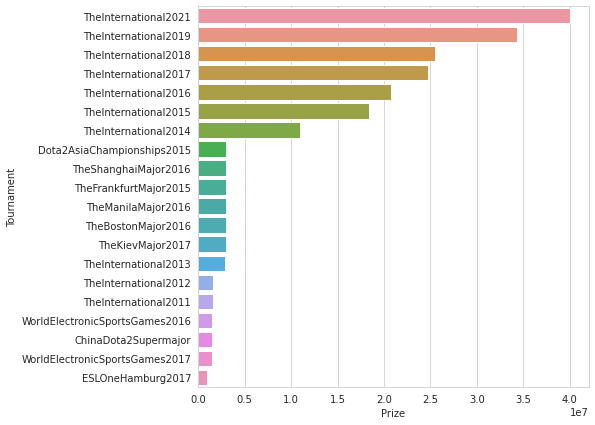

In [0]:
#allTierTournamentsSdf.sort(col("Prize").desc()).limit(20).show(truncate=False)
top20Tournaments = allTierTournamentsSdf.sort(col("Prize").desc()).limit(20).toPandas()
sn.set_style('whitegrid')
plt.figure(figsize =(7, 7))
sn.barplot(x="Prize", y="Tournament", data=top20Tournaments)

#TheInternational2021 tournament top with the highest prize pool ever with USD 40 million

/databricks/python/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
Out[34]: <seaborn.axisgrid.FacetGrid at 0x7f9db0b28820>

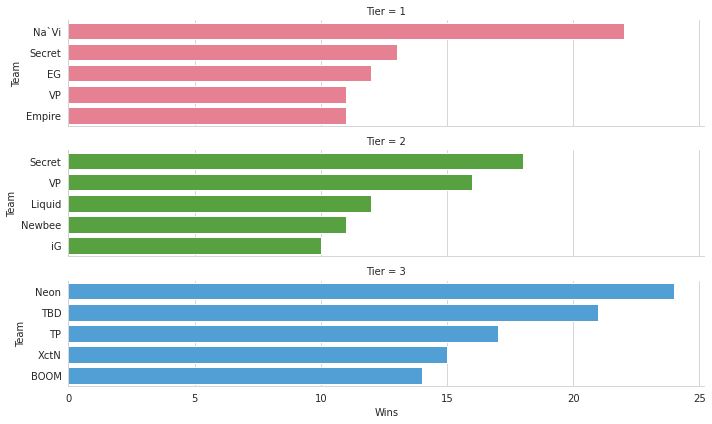

In [0]:
#tier1TeamWins = allTierTournamentsSdf.filter(allTierTournamentsSdf.Tier == 1).groupBy("Winner").count().sort(col("count").desc())
#tier1TeamWins.show()
allTierTournamentsSdf.createOrReplaceTempView('tournaments_plot')
tier1TeamWinData = sqlContext.sql("select Winner as Team, count('Winner') as Wins, Tier from tournaments_plot where Tier = 1 group by Tier, Winner")
tier1TeamWinData = tier1TeamWinData.sort(col("Wins").desc()).limit(5)
#tier1TeamWinData.show()

#tierTeamWinAx = sn.barplot(x="Wins", y="Team", data=tier1TeamWinData.toPandas())

tier2TeamWinData = sqlContext.sql("select Winner as Team, count('Winner') as Wins, Tier from tournaments_plot where Tier = 2 group by Tier, Winner")
tier2TeamWinData = tier2TeamWinData.sort(col("Wins").desc()).limit(5)
#tier2TeamWinData.show()

tier3TeamWinData = sqlContext.sql("select Winner as Team, count('Winner') as Wins, Tier from tournaments_plot where Tier = 3 group by Tier, Winner")
tier3TeamWinData = tier3TeamWinData.sort(col("Wins").desc()).limit(5)
#tier3TeamWinData.show()
#sn.barplot(x="Wins", y="Team", data=tier2TeamWinData.toPandas(), ax=tierTeamWinAx)

tierTeamWinData = tier1TeamWinData.union(tier2TeamWinData).union(tier3TeamWinData)
#tierTeamWinData.show()
#tierTeamWinData = sqlContext.sql("select Winner as Team, count('Winner') as Wins, Tier from tournaments_plot group by Tier, Winner")
g = sn.FacetGrid(tierTeamWinData.toPandas(), row="Tier", palette= "husl", hue = "Tier",
                  height=2, aspect=5, sharey = "row")
g.map(sn.barplot, "Wins", "Team")

In [0]:
leagueListingSparkDf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/LeagueListingFull.csv"))

leagueListingSparkDf.printSchema()    
leagueListingSparkDf.show(truncate=False)

matchHistorySparkDf = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/BigdataProject1/AllMatchHistoryFull.csv"))

matchHistorySparkDf.printSchema()    
matchHistorySparkDf.show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- leagueid: integer (nullable = true)
 |-- description: string (nullable = true)
 |-- tournament_url: string (nullable = true)
 |-- itemdef: integer (nullable = true)

+------------------------------------------+--------+---------------------------------------------+-----------------------------------------------------------------------------------------------+-------+
|name                                      |leagueid|description                                  |tournament_url                                                                                 |itemdef|
+------------------------------------------+--------+---------------------------------------------+-----------------------------------------------------------------------------------------------+-------+
|#DOTA_Item_Dota_2_Just_For_Fun            |1212    |#DOTA_Item_Desc_Dota_2_Just_For_Fun          |https://binarybeast.com/xDOTA21404228/                                       

In [0]:
leagueListingSparkDf = leagueListingSparkDf.withColumn("Name", translate(col("Name"), "#", "")) \
                                           .withColumn("Name", translate(col("Name"), "_", "")) \
                                           .withColumn("Name", regexp_replace('Name', 'DOTAItem', ''))
leagueListPandas = leagueListingSparkDf.toPandas()#.set_index('leagueid') 
leagueListPandas["index_id"] = leagueListPandas.index + 1
leagueListPandas.info()    
leagueListPandas

allTierPandas = allTierTournamentsSdf.toPandas()
allTierPandas["id"] = allTierPandas.index + 1
#allTierPandas.info()
#allTierPandas.head()
leagueListPandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1693 non-null   object
 1   leagueid        1693 non-null   int32 
 2   description     1693 non-null   object
 3   tournament_url  1693 non-null   object
 4   itemdef         1693 non-null   int32 
 5   index_id        1693 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 66.3+ KB


,Name,leagueid,description,tournament_url,itemdef,index_id
0,Dota2JustForFun,1212,#DOTA_Item_Desc_Dota_2_Just_For_Fun,https://binarybeast.com/xDOTA21404228/,10541,1
1,joinDOTALeagueSeason3,1640,#DOTA_Item_Desc_joinDOTA_League_Season_3,http://www.joindota.com/en/leagues/,10742,2
2,KillingSpreeNorthAmerica,25,#DOTA_Item_Desc_Killing_Spree_North_America,http://neodota.com/?page_id=1389,15014,3
3,WildCardsWest,2,#DOTA_Item_Desc_Wild_Cards_West,http://www.dota2.com/tournaments/international/,15015,4
4,WildCardsEast,3,#DOTA_Item_Desc_Wild_Cards_East,http://www.dota2.com/tournaments/international/,15016,5
...,...,...,...,...,...,...
1688,CHINADOTA2SUPERMAJOR,9943,#DOTA_Item_Desc_CHINA_DOTA2_SUPER_MAJOR,http://www.dota2.com.cn/supermajor,17441,1689
1689,ESLOneBirmingham2018poweredbyIntel,9880,#DOTA_Item_Desc_ESL_One_Birmingham_2018_powered_by_Intel,http://www.esl-one.com/dota2/birmingham-2018/,17442,1690
1690,WorldCyberArena201718GrandFinals,9959,#DOTA_Item_Desc_World_Cyber_Arena_201718_Grand_Finals,http://www.en.wca.com.cn/,17443,1691
1691,MDLChangsha,9862,#DOTA_Item_Desc_MDL_Changsha_,http://www.marslive.cn/,17458,1692


In [0]:
ssj.profile_table_for_join(leagueListPandas)

,Unique values,Missing values,Comments
Attribute,,,
Name,1690 (99.82%),0 (0.0%),
leagueid,1678 (99.11%),0 (0.0%),
description,1691 (99.88%),0 (0.0%),
tournament_url,1282 (75.72%),0 (0.0%),
itemdef,1678 (99.11%),0 (0.0%),
index_id,1693 (100.0%),0 (0.0%),This attribute can be used as a key attribute.


In [0]:
ssj.profile_table_for_join(allTierPandas)

,Unique values,Missing values,Comments
Attribute,,,
Tournament,1425 (99.65%),0 (0.0%),
Date,1371 (95.87%),0 (0.0%),
Prize,680 (47.55%),23 (1.61%),Joining on this attribute will ignore 23 (1.61%) rows.
Teams,47 (3.29%),19 (1.33%),Joining on this attribute will ignore 19 (1.33%) rows.
Location,209 (14.62%),0 (0.0%),
Winner,503 (35.17%),0 (0.0%),
Runner-up,604 (42.24%),0 (0.0%),
Tier,3 (0.21%),0 (0.0%),
Year,14 (0.98%),0 (0.0%),


In [0]:
!pip install py_stringsimjoin

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 661 kB 12.1 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp38-cp38-linux_x86_64.whl size=5069327 sha256=ab5ecdfa3ec9ac8e63c131582c97ee2bb582777582aa464b9ae40d0fc7ea63ba
  Stored in directory: /root/.cache/pip/wheels/7f/61/96/0aa1d87a2d0a9329ea415ffaf74c875c9344434844177f2b62
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp38-cp38-linux_x86_64.whl size=2692307 sha256=58e0de0aab72632af255d1618cbbca05e92688d13aca7fc8ee1a719b788e371d
  Stored in directory: /root/.cache/pip/wheels/6d/01/57/0131e0a87fa6471ec265bd9777de2e789a4bd1248c279fa875
Successfully built py-stringsimjoin py-stringmatching
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
import py_stringsimjoin as ssj
import py_stringmatching as sm

ws = sm.WhitespaceTokenizer(return_set=True)
output_pairs = ssj.jaccard_join(allTierPandas, leagueListPandas, 'id', 'index_id', 'Tournament', 'Name', ws, 0.1, allow_empty=True, allow_missing=False, l_out_attrs=['Tournament'], r_out_attrs=['Name'])
print(len(output_pairs))
output_pairs.head()
help(ssj.jaccard_join)

0% [##############################] 100% | ETA: 00:00:0078
Help on function jaccard_join in module py_stringsimjoin.join.jaccard_join:

jaccard_join(ltable, rtable, l_key_attr, r_key_attr, l_join_attr, r_join_attr, tokenizer, threshold, comp_op='>=', allow_empty=True, allow_missing=False, l_out_attrs=None, r_out_attrs=None, l_out_prefix='l_', r_out_prefix='r_', out_sim_score=True, n_jobs=1, show_progress=True)
    Join two tables using Jaccard similarity measure.
    
    For two sets X and Y, the Jaccard similarity score between them is given by:                      
                                                                                
        :math:`jaccard(X, Y) = \frac{|X \cap Y|}{|X \cup Y|}` 
    
    In the case where both X and Y are empty sets, we define their Jaccard 
    score to be 1. 
    
    Finds tuple pairs from left table and right table such that the Jaccard 
    similarity between the join attributes satisfies the condition on input 
    threshold. For e

Out[67]: <AxesSubplot:xlabel='Matches Played', ylabel='Name'>

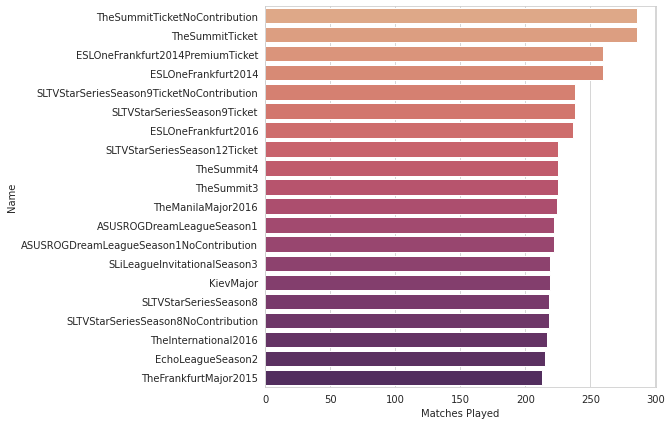

In [0]:
#matchHistorySparkDf = matchHistorySparkDf.withColumn('league_id', col('leagueid')).drop('leagueid')
leagueListingSparkDf = leagueListingSparkDf
leagueMatchesSdf = leagueListingSparkDf.join(matchHistorySparkDf,leagueListingSparkDf.leagueid ==  matchHistorySparkDf.league_id,"inner")
     
top20LeaguesWithMostMatchs = leagueMatchesSdf.groupBy('Name', 'leagueid').count().withColumn('Matches Played', col('count')).sort(col("count").desc()).limit(20).toPandas()
#top20LeaguesWithMostMatchs['Matches Played'] = 
sn.set_style('whitegrid')
plt.figure(figsize =(7, 7))
sn.barplot(x="Matches Played", y="Name", palette = "flare", data=top20LeaguesWithMostMatchs)

In [0]:
allTierTournamentsSdf.createOrReplaceTempView('allTierTournaments')

tournament_not_international_2021 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament not like '%International%' and year = 2021")
tournament_not_international_2021.groupBy('Winner').count().show()

international_tournament_2021 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament like '%International%' and year = 2021").show()
#As we can see from the output the teams which won "The International 2019" has never won any tournaments major or minor before in year 2019. Team "Team Spirit" never won any major tournaments before but won the Internaional tournament which has the highest prize pool. This team stunned the strongest teams in the world.

tournament_not_international_2019 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament not like '%International%' and year = 2019")
tournament_not_international_2019.groupBy('Winner').count().show()

international_tournament_2019 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament like '%International%' and year = 2019").show()

#As we can see from the output the teams which won and came as runner up in "The International 2019" has never won any tournaments major or minor before in year 2019. Team "OG" never won any major tournaments before but won the Internaional tournament which has the highest prize pool.

tournament_not_international_2018 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament not like '%International%' and year = 2018")
tournament_not_international_2018.groupBy('Winner').count().show()

international_tournament_2018 = sqlContext.sql("select * from allTierTournaments where Tier = 1 and tournament like '%International%' and year = 2018").show()

#As we can see from the output the teams which won and came as runner up in "The International 2018" has never won any tournaments major or minor before in year 2018. Team "OG" never won any major tournaments before but won the Internaional tournament which has the highest prize pool.


+-------+-----+
| Winner|count|
+-------+-----+
|PSG.LGD|    2|
| Tundra|    1|
|     iG|    1|
|     T1|    1|
+-------+-----+

+--------------------+-------------+-----------+-----+-----------------+-------+---------+----+----+
|          Tournament|         Date|      Prize|Teams|         Location| Winner|Runner-up|Tier|Year|
+--------------------+-------------+-----------+-----+-----------------+-------+---------+----+----+
|TheInternational2021|Oct07-17,2021|4.0018195E7|   18|Bucharest,Romania|TSpirit|  PSG.LGD|   1|2021|
+--------------------+-------------+-----------+-----+-----------------+-------+---------+----+----+

+------+-----+
|Winner|count|
+------+-----+
|    VG|    3|
|   TNC|    2|
|Secret|    2|
+------+-----+

+--------------------+-------------+-----------+-----+--------------+------+---------+----+----+
|          Tournament|         Date|      Prize|Teams|      Location|Winner|Runner-up|Tier|Year|
+--------------------+-------------+-----------+-----+-----------

In [0]:
allTierTournamentsSdf = allTierTournamentsSdf.sort(col("year").asc())
allTierTournamentsSdf.createOrReplaceTempView('tournaments')
tournament_international = sqlContext.sql("select * from tournaments where Tier = 1 and tournament like '%International%' sort by year asc")
tournament_international.show(truncate=False)

+--------------------+----------------+-----------+-----+--------------------+-------+---------+----+----+
|Tournament          |Date            |Prize      |Teams|Location            |Winner |Runner-up|Tier|Year|
+--------------------+----------------+-----------+-----+--------------------+-------+---------+----+----+
|TheInternational2011|Aug17-21,2011   |1600000.0  |16   |Cologne,Germany     |Na`Vi  |EHOME    |1   |2011|
|TheInternational2012|Aug26-Sep02,2012|1600000.0  |16   |Seattle,UnitedStates|iG     |Na`Vi    |1   |2012|
|TheInternational2013|Aug02-11,2013   |2874380.0  |16   |Seattle,UnitedStates|[A]    |Na`Vi    |1   |2013|
|TheInternational2014|Jul08-21,2014   |1.0923977E7|19   |Seattle,UnitedStates|Newbee |VG       |1   |2014|
|TheInternational2015|Jul27-Aug08,2015|1.8429613E7|16   |Seattle,UnitedStates|EG     |CDEC     |1   |2015|
|TheInternational2016|Aug02-13,2016   |2.077046E7 |16   |Seattle,UnitedStates|Wings  |DC       |1   |2016|
|TheInternational2017|Aug02-12,2017  

In [0]:
#Exploratory data analysis
tournament_international.select([max('Prize'), mean('Prize'), min('Prize')] ).show()

+-----------+------------+----------+
| max(Prize)|  avg(Prize)|min(Prize)|
+-----------+------------+----------+
|4.0018195E7|1.80866786E7| 1600000.0|
+-----------+------------+----------+



Out[8]: <AxesSubplot:>

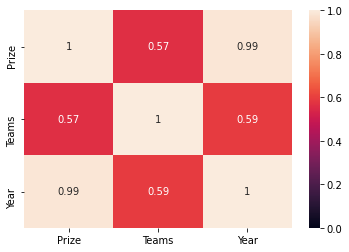

In [0]:
# finding corelation between the columns
corrColumns  = ['Prize','Teams', 'Year']

corr_df = Statistics.corr(tournament_international.rdd.map(lambda x: np.array([x['Prize'], x['Teams'], x['Year']])), method='pearson')


sn.heatmap( corr_df, vmin=0, vmax=1, annot= True, xticklabels = corrColumns, yticklabels = corrColumns)

Out[9]: <AxesSubplot:xlabel='Year', ylabel='Prize'>

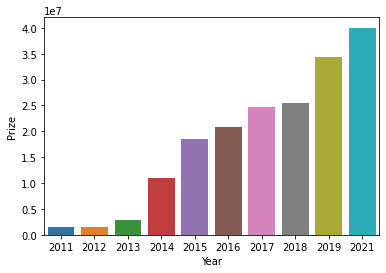

Tournament,Date,Prize,Teams,Location,Winner,Runner-up,Tier,Year
TheInternational2011,"Aug17-21,2011",1600000.0,16,"Cologne,Germany",Na`Vi,EHOME,1,2011
TheInternational2012,"Aug26-Sep02,2012",1600000.0,16,"Seattle,UnitedStates",iG,Na`Vi,1,2012
TheInternational2013,"Aug02-11,2013",2874380.0,16,"Seattle,UnitedStates",[A],Na`Vi,1,2013
TheInternational2014,"Jul08-21,2014",1.0923977E7,19,"Seattle,UnitedStates",Newbee,VG,1,2014
TheInternational2015,"Jul27-Aug08,2015",1.8429613E7,16,"Seattle,UnitedStates",EG,CDEC,1,2015
TheInternational2016,"Aug02-13,2016",2.077046E7,16,"Seattle,UnitedStates",Wings,DC,1,2016
TheInternational2017,"Aug02-12,2017",2.4787916E7,18,"Seattle,UnitedStates",Liquid,Newbee,1,2017
TheInternational2018,"Aug15-25,2018",2.5532177E7,18,"Vancouver,Canada",OG,PSG.LGD,1,2018
TheInternational2019,"Aug15-25,2019",3.4330068E7,18,"Shanghai,China",OG,Liquid,1,2019
TheInternational2021,"Oct07-17,2021",4.0018195E7,18,"Bucharest,Romania",TSpirit,PSG.LGD,1,2021


In [0]:
barChartPd = tournament_international.toPandas()
barChartPd.display()
sn.barplot( data = barChartPd, x='Year', y='Prize', order = barChartPd.Year)

In [0]:
tournament_international = tournament_international.withColumn( 'log_prize', log('Prize') )

In [0]:
feature_columns = ['Year', 'Teams']

# preparing dataframe for model building

assembler = VectorAssembler( inputCols = feature_columns, outputCol = "features")
assembler.outputCol

tournamentsModelDf = assembler.transform( tournament_international )

tournamentsModelDf = tournamentsModelDf.withColumn( "label", round('log_prize', 4))

#trainTournament_international = tournamentsModelDf.filter(tournamentsModelDf.Year != 2022)
#trainTournament_international.show(truncate=False)
#testTournament_international = tournamentsModelDf.filter(tournamentsModelDf.Year == 2021)
#testTournament_international.show(truncate=False)

trainTournament_international, testTournament_international = tournamentsModelDf.randomSplit( [0.9, 0.1], seed = 42 )


ir = IsotonicRegression(featuresCol='features', labelCol='label')
#ir.setFeaturesCol("Year")
#ir.setLabelCol("Prize")
isotonicModel = ir.fit(trainTournament_international)


predictionData = isotonicModel.transform(testTournament_international)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
predictionData.show(truncate=False)


+--------------------+-------------+-----------+-----+--------------------+------+---------+----+----+------------------+-------------+-------+------------------+--------------------+
|Tournament          |Date         |Prize      |Teams|Location            |Winner|Runner-up|Tier|Year|log_prize         |features     |label  |prediction        |pred                |
+--------------------+-------------+-----------+-----+--------------------+------+---------+----+----+------------------+-------------+-------+------------------+--------------------+
|TheInternational2017|Aug02-12,2017|2.4787916E7|18   |Seattle,UnitedStates|Liquid|Newbee   |1   |2017|17.025866834321906|[2017.0,18.0]|17.0259|16.95225          |2.3028658039617717E7|
|TheInternational2019|Aug15-25,2019|3.4330068E7|18   |Shanghai,China      |OG    |Liquid   |1   |2019|17.351532146206747|[2019.0,18.0]|17.3515|17.205266666666667|2.965871788501255E7 |
+--------------------+-------------+-----------+-----+--------------------+-----

In [0]:
print(isotonicModel.boundaries)
#predictionData = predictionData.withColumn('y_pred', func.round(df["y_pred"]).cast('integer'))
predictionData = predictionData.withColumn('pred', col("pred").cast('integer'))
predictionData.select('pred').printSchema()
predictionData.select('pred').show()

def getR2AndRmse( predictedDf ):
    predictedDf = predictedDf.withColumn( "pred", exp( 'prediction' ) )
    rmse_evaluator = RegressionEvaluator(labelCol="Prize", predictionCol="pred", metricName="rmse" )
    r2_evaluator = RegressionEvaluator(labelCol="Prize", predictionCol="pred", metricName="r2" )
    return [np.round( r2_evaluator.evaluate( predictedDf ), 2), np.round( rmse_evaluator.evaluate( predictedDf ), 2 )]

r2, rmse = getR2AndRmse(predictionData)
model_perf = pd.DataFrame( columns = ['name', 'rsquared', 'rmse'] )
model_perf = model_perf.append( pd.Series( ["Isotonic Regression", r2, rmse],
                 index = model_perf.columns ),
                 ignore_index = True )

[2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2018.0,2021.0]
root
 |-- pred: integer (nullable = true)

+--------+
|    pred|
+--------+
|23028658|
|29658717|
+--------+



In [0]:


def getBestModel( paramGrid, lModel, train, test ):
    evaluator = RegressionEvaluator(
      metricName="r2",
      labelCol="label",
  )
    crossval = CrossValidator(estimator=lModel,
                        estimatorParamMaps=paramGrid,
                        evaluator=evaluator,
                        numFolds=2)  # use 3+ folds in practice
    cvModel = crossval.fit( train )
    predictedDf = cvModel.bestModel.transform( test )
    
    r2, rmse = getR2AndRmse(predictedDf)
    
    print( "RMSE: ", np.round( rmse, 2 ) )
    print( "R-Squared: ", np.round( r2, 2 ) )
    
    return cvModel, rmse, r2



In [0]:
lrModel  =  LinearRegression(maxIter=50)

paramGrid = ParamGridBuilder().addGrid(lrModel.regParam, [0.1, 0.01, 0.001]).addGrid(lrModel.elasticNetParam, [0.0]).build()

ridgeModel, rmse, r2 = getBestModel(paramGrid,
                                 lrModel,
                                 trainTournament_international,
                                 testTournament_international )



model_perf = model_perf.append( pd.Series( ["Ridge Regression", r2, rmse],
                 index = model_perf.columns ),
                 ignore_index = True )

paramGrid = ParamGridBuilder().addGrid(lrModel.regParam, [0.1, 0.01, 0.001]).addGrid(lrModel.elasticNetParam, [1.0]).build()

lassoModel, rmse, r2 = getBestModel(paramGrid,
                                 lrModel,
                                 trainTournament_international,
                                 testTournament_international )

model_perf = model_perf.append( pd.Series( ["Lasso Regression", r2, rmse] ,
                 index = model_perf.columns ),
                 ignore_index = True )

paramGrid = ParamGridBuilder().addGrid(lrModel.regParam, [0.1, 0.01]).addGrid(lrModel.elasticNetParam, [0.2, 0.5]).build()

elasticNetModel, rmse, r2 = getBestModel(paramGrid,
                                 lrModel,
                                 trainTournament_international,
                                 testTournament_international )

model_perf = model_perf.append( pd.Series( ["ElasticNet Regression", r2, rmse] ,
                 index = model_perf.columns ),
                 ignore_index = True )



/databricks/spark/python/pyspark/ml/util.py:886: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)
RMSE:  4699447.72
R-Squared:  0.03
RMSE:  4724319.01
R-Squared:  0.02
RMSE:  4924226.29
R-Squared:  -0.07


In [0]:
#Gradient Boosted Tree Regression
gbt = GBTRegressor(featuresCol="features", labelCol='label', maxIter=100)
gbtModel = gbt.fit(trainTournament_international)


predictionData = gbtModel.transform(testTournament_international)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
r2, rmse = getR2AndRmse(predictionData)

model_perf = model_perf.append( pd.Series( ["Gradient Boosted Tree Regression", r2, rmse] ,
                 index = model_perf.columns ),
                 ignore_index = True )

model_perf

,name,rsquared,rmse
0,Isotonic Regression,0.45,3529624.66
1,Ridge Regression,0.03,4699447.72
2,Lasso Regression,0.02,4724319.01
3,ElasticNet Regression,-0.07,4924226.29
4,Gradient Boosted Tree Regression,-4.92,11609917.45


In [0]:
#Using the best Regression which is Isotonic Regression to predict the Prize pool of the next "The International" tournament which is going to held on September 2022.
tournament2022Schema = StructType([ \
    StructField("Tournament",StringType(),True), \
    StructField("Date",StringType(),True), \
    StructField("Prize",DoubleType(),True), \
    StructField("Teams",IntegerType(),True), \
    StructField("Location", StringType(), True), \
    StructField("Winner", StringType(), True), \
    StructField("Runner-up", StringType(), True), \
    StructField("Tier", IntegerType(), True), \
    StructField("Year", IntegerType(), True)
  ])
tournament2022Df = tournament_international.filter(tournament_international.Year == 2022)
tournament2022Columns = ["Tournament", "Date", "Prize", "Teams", "Location", "Winner", "Runner-up", "Tier", "Year"] 
tournament2022Values = [["TheInternational2022", "Aug,2022", 0.0, 18, "Stockholm", "NA", "NA", 1, 2022]]
tournament2022Df = spark.createDataFrame(tournament2022Values, schema = tournament2022Schema)
tournament2022ModelDf = assembler.transform( tournament2022Df )

predictionData = isotonicModel.transform(tournament2022ModelDf)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
print("Isotonic Model Prediction of future values")
predictionData.show(truncate=False)

predictionData = ridgeModel.bestModel.transform(tournament2022ModelDf)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
print("Ridge Model Prediction of future values")
predictionData.show(truncate=False)

predictionData = lassoModel.bestModel.transform(tournament2022ModelDf)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
print("Lasso Model Prediction of future values")
predictionData.show(truncate=False)

predictionData = elasticNetModel.bestModel.transform(tournament2022ModelDf)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
print("ElasticNet Model Prediction of future values")
predictionData.show(truncate=False)

predictionData = gbtModel.transform(tournament2022ModelDf)
predictionData = predictionData.withColumn( "pred", exp( 'prediction' ) )
print("Gradient Boosted Tree Model Prediction of future values")
predictionData.show(truncate=False)

Isotonic Model Prediction of future values
+--------------------+--------+-----+-----+---------+------+---------+----+----+-------------+----------+-------------------+
|Tournament          |Date    |Prize|Teams|Location |Winner|Runner-up|Tier|Year|features     |prediction|pred               |
+--------------------+--------+-----+-----+---------+------+---------+----+----+-------------+----------+-------------------+
|TheInternational2022|Aug,2022|0.0  |18   |Stockholm|NA    |NA       |1   |2022|[2022.0,18.0]|17.5048   |4.001640287913296E7|
+--------------------+--------+-----+-----+---------+------+---------+----+----+-------------+----------+-------------------+

Ridge Model Prediction of future values
+--------------------+--------+-----+-----+---------+------+---------+----+----+-------------+------------------+-------------------+
|Tournament          |Date    |Prize|Teams|Location |Winner|Runner-up|Tier|Year|features     |prediction        |pred               |
+-----------------

In [0]:
#To predict values within the boundaries, Isotonic regression is better, but for predicting the future values, Linear regression ridge model is best. 
#saving Isotonic and Ridge models
dbutils.fs.rm("/FileStore/tables/BigdataProject1/Models", True)
isotonicModel.save("/FileStore/tables/BigdataProject1/Models/Isotonic")
ridgeModel.bestModel.save("/FileStore/tables/BigdataProject1/Models/Ridge")